In [1]:
!pip install --upgrade pandas_datareader pandas


In [2]:
import pandas_datareader as pdr
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/JuPyter Notebook/.ipynb_checkpoints/AAPL.csv')


In [4]:
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [5]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1990-06-25,0.370536,0.372768,0.359375,0.368304,0.294235,122001600
1,1,1990-06-26,0.372768,0.375000,0.360491,0.362723,0.289777,127254400
2,2,1990-06-27,0.363839,0.375000,0.359375,0.370536,0.296018,97227200
3,3,1990-06-28,0.381696,0.386161,0.372768,0.383929,0.306718,249939200
4,4,1990-06-29,0.383929,0.400670,0.381696,0.399554,0.319201,325192000


In [6]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
8308,8308,2023-06-16,186.729996,186.990005,184.270004,184.919998,184.919998,101235600
8309,8309,2023-06-20,184.410004,186.100006,184.410004,185.009995,185.009995,49799100
8310,8310,2023-06-21,184.899994,185.410004,182.589996,183.960007,183.960007,49515700
8311,8311,2023-06-22,183.740005,187.050003,183.669998,187.000000,187.000000,51245300
8312,8312,2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0         0.368304
1         0.362723
2         0.370536
3         0.383929
4         0.399554
           ...    
8308    184.919998
8309    185.009995
8310    183.960007
8311    187.000000
8312    186.679993
Name: Close, Length: 8313, dtype: float64

In [9]:
df1.shape

(8313,)

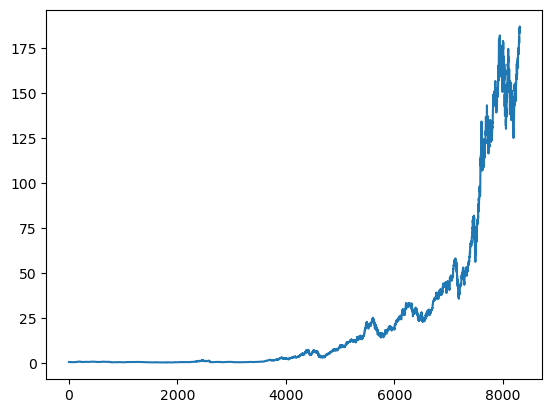

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
#LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.00135266]
 [0.0013228 ]
 [0.0013646 ]
 ...
 [0.9837333 ]
 [1.        ]
 [0.99828767]]


In [14]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(5819, 2494)

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(5718, 100)
(5718,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(2393, 100)
(2393,)


(None, None)

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
!pip install tensorflow


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
# Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 287ms/step - loss: 2.2972e-04 - val_loss: 0.0034
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - loss: 4.8160e-06 - val_loss: 0.0035
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 273ms/step - loss: 3.8815e-06 - val_loss: 0.0026
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - loss: 3.6299e-06 - val_loss: 0.0022
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 267ms/step - loss: 5.2718e-06 - val_loss: 0.0054
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 284ms/step - loss: 3.7288e-06 - val_loss: 0.0044
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 260ms/step - loss: 4.4732e-06 - val_loss: 0.0048
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - loss: 3.5004e-06 - val_loss: 0.0044
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - loss: 3.1840e-06 - val_loss: 0.0049
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - loss: 3.5134e-06 - val_loss: 0.0044
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - loss: 4.2173e-06 - val

In [26]:
import tensorflow as tf

In [27]:

tf.__version__

'2.17.0'

In [59]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


In [29]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6.335517494545971

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


83.55893037058489

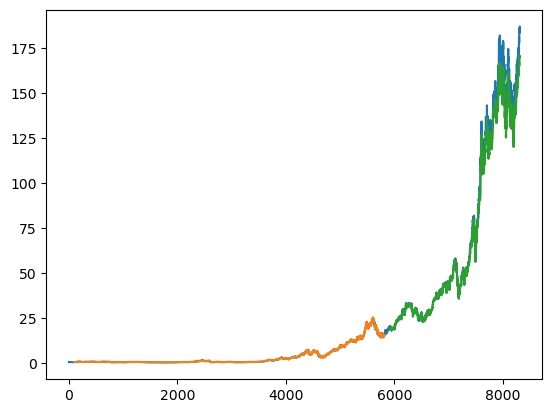

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:

len(test_data)

2494

In [45]:
x_input=test_data[2394:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.15446432961554485,
 0.1538757253832417,
 0.1532202456162132,
 0.1497421613170065,
 0.1520430532043037,
 0.14914017983739872,
 0.1486987413781434,
 0.1461704416375662,
 0.14416385454187003,
 0.14218401658988422,
 0.1457423697238177,
 0.15007659249962252,
 0.14891277198411873,
 0.15046453802235604,
 0.14992944277927148,
 0.1492204540230244,
 0.15186913828754553,
 0.15176213101090624,
 0.14990268293376327,
 0.14703995201057005,
 0.14563534639448164,
 0.14151515422465216,
 0.1415285368228557,
 0.14352174132034834,
 0.1490599217044698,
 0.1492204540230244,
 0.14552832841604452,
 0.14682592140459472,
 0.1462640823686987,
 0.1422776573210167,
 0.14116734044383258,
 0.14481933430889854,
 0.14592965118608267,
 0.1497421613170065,
 0.1505180470115746,
 0.15067856862833137,
 0.14538117869569347,
 0.15363493493175814,
 0.15843737206502326,
 0.15610973638491463,
 0.15807618103689902,
 0.15810294088240723,
 0.15932026503623065,
 0.15982861113560487,
 0.1584775038069372,
 0.15953430634400384,
 0.1

In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.91759473]
101
1 day input [0.77756309 0.80640451 0.82609579 0.81127377 0.82689839 0.81229046
 0.806672   0.80742112 0.82261773 0.8191396  0.83053704 0.82186861
 0.81566155 0.79388335 0.79618428 0.79880617 0.78441232 0.79088686
 0.78815793 0.77692101 0.78013158 0.80752816 0.82251069 0.81057821
 0.81737379 0.80517375 0.79399039 0.80453167 0.81587555 0.81801595
 0.83331953 0.82877123 0.84161336 0.85167308 0.84391429 0.84980023
 0.85686345 0.84632218 0.84295108 0.85964594 0.86815386 0.8817451
 0.88854076 0.88565132 0.87564508 0.88046094 0.86638805 0.85980646
 0.85606085 0.88527672 0.88340395 0.88351091 0.89014605 0.89635311
 0.89110917 0.88238726 0.88404603 0.87569864 0.87564508 0.90052681
 0.90732239 0.90684083 0.90122237 0.89538991 0.8865074  0.92813746
 0.92776286 0.91850583 0.92808391 0.92910059 0.92278657 0.92011112
 0.92011112 0.92342865 0.93605677 0.93664538 0.93150848 0.91738211
 0.91888035 0.92503393 0.93809006 0.9480963  0.94782874 0.96302527
 0.96762705 0.96029634 0.95831653 

In [88]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [71]:
import matplotlib.pyplot as plt

In [72]:
len(df1)

8313

In [73]:
df3=df1.tolist()
df3.extend(lst_output)

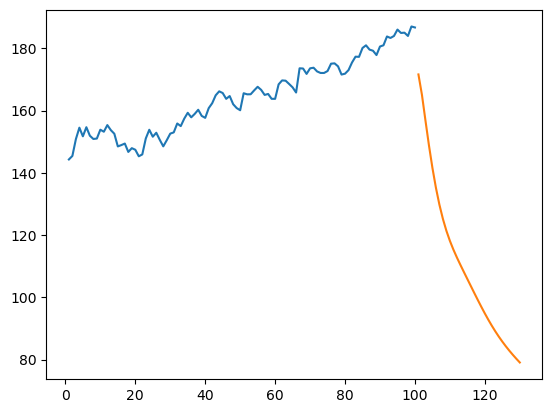

In [89]:
plt.plot(day_new,scaler.inverse_transform(df1[8213:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


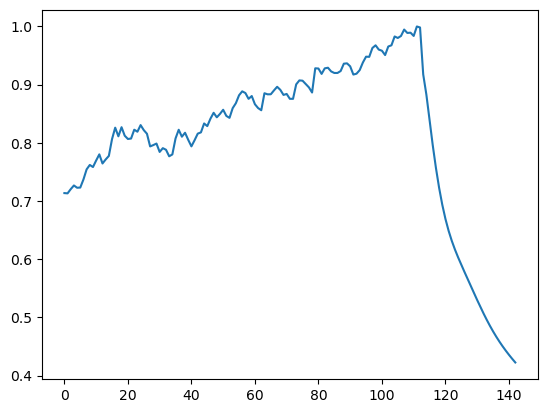

In [90]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[8200:])


In [91]:
df3=scaler.inverse_transform(df3).tolist()


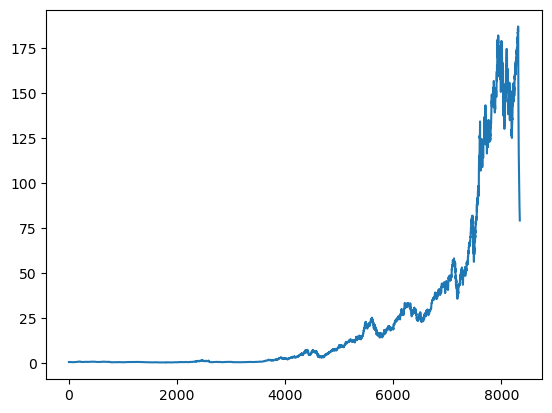

In [92]:
plt.plot(df3)